[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(0,
  '0.007*"model" + 0.005*"data" + 0.005*"learning" + 0.004*"one" + '
  '0.004*"figure" + 0.003*"algorithm" + 0.003*"time" + 0.003*"set" + '
  '0.003*"two" + 0.003*"using"'),
 (1,
  '0.006*"set" + 0.005*"model" + 0.004*"learning" + 0.004*"algorithm" + '
  '0.004*"one" + 0.004*"data" + 0.004*"using" + 0.003*"number" + '
  '0.003*"function" + 0.003*"two"'),
 (2,
  '0.007*"learning" + 0.006*"model" + 0.005*"data" + 0.005*"function" + '
  '0.004*"one" + 0.004*"using" + 0.004*"set" + 0.004*"algorithm" + '
  '0.003*"matrix" + 0.003*"number"'),
 (3,
  '0.006*"model" + 0.005*"learning" + 0.005*"using" + 0.004*"one" + '
  '0.004*"set" + 0.004*"time" + 0.003*"data" + 0.003*"network" + '
  '0.003*"function" + 0.003*"number"'),
 (4,
  '0.006*"model" + 0.005*"data" + 0.004*"learning" + 0.004*"using" + '
  '0.004*"function" + 0.003*"set" + 0.003*"number" + 0.003*"one" + '
  '0.003*"training" + 0.003*"figure"'),
 (5,
  '0.007*"data" + 0.005*"learning" + 0.004*"model" + 0.004*"function" + '
  '0.0

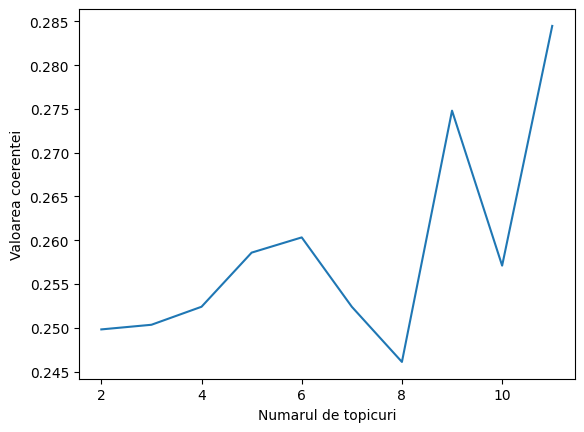

In [28]:
import pandas as pd
import os


papers = pd.read_csv("papers.csv")
# elimina coloanele

papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# Load the regular expression library
import re

# elimina punctuatia
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Uppercase devin lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# se elimina stop words
data_words = remove_stopwords(data_words)

import gensim.corpora as corpora

# Se creaza dictionar
id2word = corpora.Dictionary(data_words)
texts = data_words

# Se foloseste conceptul de bags of words astfel documentul este transfomat in cuvinte separate necontand ordinea
corpus = [id2word.doc2bow(text) for text in texts]

from pprint import pprint

num_topics = 7

# Build LDA model
LDAmodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word,num_topics=num_topics)

# Se printeaza 10 cuvinte cheie pentru temele alese
pprint(LDAmodel.print_topics())
doc_lda = LDAmodel[corpus]

import matplotlib.pyplot as plt

from gensim.models.coherencemodel import CoherenceModel

# Creaza un obiect CoherenceModel
coherence_model_lda = CoherenceModel(model=LDAmodel, texts=data_words, dictionary=id2word, coherence='c_v')

# Obtine valoarea coerentei
coherence_values = coherence_model_lda.get_coherence_per_topic()

# Creaza graficul cu valoarea coerentei in functie de numarul de topicuri
x=range(2, num_topics+5, 1)
plt.plot(x, coherence_values)
plt.xlabel("Numarul de topicuri")
plt.ylabel("Valoarea coerentei")
plt.show()

